In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_row', 200)
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

### Import dataset

In [2]:
# Read dataset from csv file
df = pd.read_csv('datasets/ds_homework_sample.csv', sep='|')

# We delete the last raw since all valuse are NaN 
df = df.iloc[:-1,:]
df.head()

,date_time,banner_id,advertiser_id,offer_id,zone_id,affiliate_id,geo,region_code,city_code,varp,os_type,os,os_version,device_type,device,browser,lang,varpp,varcc,isp,mobile_isp,proxy,netspeed,impressions,conversions
0,2016-09-09 10:00:00,23051597.0,502713.0,492.0,4375553.0,2505762.0,BR,726.0,4162.0,4.0,mobile,android,android5,tablet,other,fb,pt,1.0,0.0,17111.0,0.0,f,BROADBAND,1.0,0.0
1,2016-09-05 14:00:00,23075994.0,8508.0,2287.0,13732852.0,6530828.0,RO,12074.0,512299.0,1.0,desktop,windows,win7,desktop,desktop,chrome,ro,2.0,0.0,88118.0,0.0,f,BROADBAND,1.0,0.0
2,2016-09-08 22:00:00,21359300.0,17528.0,NaN,12242731.0,5797966.0,EG,25295.0,29514.0,4.0,mobile,android,android6,tablet,other,chrome,en,6.0,0.0,102851.0,0.0,f,BROADBAND,1.0,0.0
3,2016-09-10 19:00:00,23074678.0,420481.0,2287.0,5388033.0,62457.0,JO,25649.0,12381.0,1.0,desktop,windows,win8,desktop,desktop,ie,en,2.0,0.0,105638.0,0.0,f,BROADBAND,1.0,0.0
4,2016-09-14 00:00:00,22289011.0,450621.0,NaN,11164447.0,3927.0,BR,10122.0,11105.0,1.0,desktop,windows,win10,desktop,desktop,chrome,pt,2.0,0.0,104045.0,0.0,f,BROADBAND,1.0,0.0


### Analize dataset

In [3]:
# Get info about all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   date_time      1000000 non-null  object 
 1   banner_id      1000000 non-null  float64
 2   advertiser_id  1000000 non-null  float64
 3   offer_id       392841 non-null   float64
 4   zone_id        1000000 non-null  float64
 5   affiliate_id   1000000 non-null  float64
 6   geo            999926 non-null   object 
 7   region_code    1000000 non-null  float64
 8   city_code      1000000 non-null  float64
 9   varp           1000000 non-null  float64
 10  os_type        1000000 non-null  object 
 11  os             1000000 non-null  object 
 12  os_version     1000000 non-null  object 
 13  device_type    1000000 non-null  object 
 14  device         1000000 non-null  object 
 15  browser        1000000 non-null  object 
 16  lang           1000000 non-null  object 
 17  varpp    

In [4]:
df.isnull().sum()

date_time             0
banner_id             0
advertiser_id         0
offer_id         607159
zone_id               0
affiliate_id          0
geo                  74
region_code           0
city_code             0
varp                  0
os_type               0
os                    0
os_version            0
device_type           0
device                0
browser               0
lang                  0
varpp                 0
varcc                 0
isp                   0
mobile_isp            0
proxy                 0
netspeed              0
impressions           0
conversions           0
dtype: int64

In [5]:
# Since "offer_id" has a lot of NaN values and "date_time" is not relevante for
# this problem, we will delete these columns from dataset
df = df.drop(['date_time','offer_id'], axis=1)
df.head()

,banner_id,advertiser_id,zone_id,affiliate_id,geo,region_code,city_code,varp,os_type,os,os_version,device_type,device,browser,lang,varpp,varcc,isp,mobile_isp,proxy,netspeed,impressions,conversions
0,23051597.0,502713.0,4375553.0,2505762.0,BR,726.0,4162.0,4.0,mobile,android,android5,tablet,other,fb,pt,1.0,0.0,17111.0,0.0,f,BROADBAND,1.0,0.0
1,23075994.0,8508.0,13732852.0,6530828.0,RO,12074.0,512299.0,1.0,desktop,windows,win7,desktop,desktop,chrome,ro,2.0,0.0,88118.0,0.0,f,BROADBAND,1.0,0.0
2,21359300.0,17528.0,12242731.0,5797966.0,EG,25295.0,29514.0,4.0,mobile,android,android6,tablet,other,chrome,en,6.0,0.0,102851.0,0.0,f,BROADBAND,1.0,0.0
3,23074678.0,420481.0,5388033.0,62457.0,JO,25649.0,12381.0,1.0,desktop,windows,win8,desktop,desktop,ie,en,2.0,0.0,105638.0,0.0,f,BROADBAND,1.0,0.0
4,22289011.0,450621.0,11164447.0,3927.0,BR,10122.0,11105.0,1.0,desktop,windows,win10,desktop,desktop,chrome,pt,2.0,0.0,104045.0,0.0,f,BROADBAND,1.0,0.0


In [6]:
# Check if raws where "geo" is NaN have conversions
check_df = df[df['geo'].isna()]
print(check_df['impressions'].value_counts())
print(check_df['conversions'].value_counts())

# Since there is no conversions where "geo" is NaN we can delete these raws from dataset
df = df.dropna(subset=['geo'])

impressions
1.0    73
2.0     1
Name: count, dtype: int64
conversions
0.0    74
Name: count, dtype: int64


In [7]:
# Let's now encode object columns

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the string data into a new column
string_data = ['geo', 'os_type', 'os', 'os_version', 'device_type', 'device',
               'browser', 'lang', 'proxy', 'netspeed']

for i in string_data:
    df[i] = encoder.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999926 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   banner_id      999926 non-null  float64
 1   advertiser_id  999926 non-null  float64
 2   zone_id        999926 non-null  float64
 3   affiliate_id   999926 non-null  float64
 4   geo            999926 non-null  int32  
 5   region_code    999926 non-null  float64
 6   city_code      999926 non-null  float64
 7   varp           999926 non-null  float64
 8   os_type        999926 non-null  int32  
 9   os             999926 non-null  int32  
 10  os_version     999926 non-null  int32  
 11  device_type    999926 non-null  int32  
 12  device         999926 non-null  int32  
 13  browser        999926 non-null  int32  
 14  lang           999926 non-null  int32  
 15  varpp          999926 non-null  float64
 16  varcc          999926 non-null  float64
 17  isp            999926 non-null  fl

In [8]:
# Check dataframe if all is ok
df.head()

,banner_id,advertiser_id,zone_id,affiliate_id,geo,region_code,city_code,varp,os_type,os,os_version,device_type,device,browser,lang,varpp,varcc,isp,mobile_isp,proxy,netspeed,impressions,conversions
0,23051597.0,502713.0,4375553.0,2505762.0,30,726.0,4162.0,4.0,1,0,3,3,5,2,74,1.0,0.0,17111.0,0.0,0,1,1.0,0.0
1,23075994.0,8508.0,13732852.0,6530828.0,174,12074.0,512299.0,1.0,0,7,23,0,0,0,77,2.0,0.0,88118.0,0.0,0,1,1.0,0.0
2,21359300.0,17528.0,12242731.0,5797966.0,61,25295.0,29514.0,4.0,1,0,4,3,5,0,21,6.0,0.0,102851.0,0.0,0,1,1.0,0.0
3,23074678.0,420481.0,5388033.0,62457.0,104,25649.0,12381.0,1.0,0,7,24,0,0,4,21,2.0,0.0,105638.0,0.0,0,1,1.0,0.0
4,22289011.0,450621.0,11164447.0,3927.0,30,10122.0,11105.0,1.0,0,7,22,0,0,0,74,2.0,0.0,104045.0,0.0,0,1,1.0,0.0


In [9]:
# To predict probability of the conversions, we will create conversion rate column as conversions/impressions

# We check if there is no impressions, what is going with converision.
# We check if there are no impressions, and what is going on with conversions. 
# From the results, you can see that for impressions = 0, we have 1 or 2 conversions. 
# This is needed domain knowledge to understand if is it an error or not. 
# Because of that we will assume that this is an error and delete these rows. 

df_impressions_0 = df[df['impressions'] == 0]
print(df_impressions_0['conversions'].value_counts())

df = df[df['impressions'] != 0]
df = df.reset_index()

# Column 'cr' will be conversions rate
# We also check that the conversion rate is not greater than 1.
df["cr"] = df["conversions"] / df["impressions"]
for i in range(df["conversions"].shape[0]):
    if df['cr'].iloc[i]>1:
        k=i

df = df.drop(k, axis=0)
df.head()

conversions
1.0    896
2.0      3
Name: count, dtype: int64


,index,banner_id,advertiser_id,zone_id,affiliate_id,geo,region_code,city_code,varp,os_type,os,os_version,device_type,device,browser,lang,varpp,varcc,isp,mobile_isp,proxy,netspeed,impressions,conversions,cr
0,0,23051597.0,502713.0,4375553.0,2505762.0,30,726.0,4162.0,4.0,1,0,3,3,5,2,74,1.0,0.0,17111.0,0.0,0,1,1.0,0.0,0.0
1,1,23075994.0,8508.0,13732852.0,6530828.0,174,12074.0,512299.0,1.0,0,7,23,0,0,0,77,2.0,0.0,88118.0,0.0,0,1,1.0,0.0,0.0
2,2,21359300.0,17528.0,12242731.0,5797966.0,61,25295.0,29514.0,4.0,1,0,4,3,5,0,21,6.0,0.0,102851.0,0.0,0,1,1.0,0.0,0.0
3,3,23074678.0,420481.0,5388033.0,62457.0,104,25649.0,12381.0,1.0,0,7,24,0,0,4,21,2.0,0.0,105638.0,0.0,0,1,1.0,0.0,0.0
4,4,22289011.0,450621.0,11164447.0,3927.0,30,10122.0,11105.0,1.0,0,7,22,0,0,0,74,2.0,0.0,104045.0,0.0,0,1,1.0,0.0,0.0


In [10]:
# We began preparing the machine learning models for the classification task by creating
# a 'cp' column to describe the classes. We assigned the data to class 1 or class 0 (true/false) 
# according to the conversion rate value. 
# Class 1 represents landing pages with a conversion rate above the mean, while class 0 represents 
# landing pages with a conversion rate equal to or below the mean.

treshold = df['cr'].mean()
cp = []
for i in range(df['cr'].shape[0]):
    if df['cr'].iloc[i] > treshold:
        cp.append(1)
    else:
        cp.append(0) 
df['cp'] = cp

df.head()

,index,banner_id,advertiser_id,zone_id,affiliate_id,geo,region_code,city_code,varp,os_type,os,os_version,device_type,device,browser,lang,varpp,varcc,isp,mobile_isp,proxy,netspeed,impressions,conversions,cr,cp
0,0,23051597.0,502713.0,4375553.0,2505762.0,30,726.0,4162.0,4.0,1,0,3,3,5,2,74,1.0,0.0,17111.0,0.0,0,1,1.0,0.0,0.0,0
1,1,23075994.0,8508.0,13732852.0,6530828.0,174,12074.0,512299.0,1.0,0,7,23,0,0,0,77,2.0,0.0,88118.0,0.0,0,1,1.0,0.0,0.0,0
2,2,21359300.0,17528.0,12242731.0,5797966.0,61,25295.0,29514.0,4.0,1,0,4,3,5,0,21,6.0,0.0,102851.0,0.0,0,1,1.0,0.0,0.0,0
3,3,23074678.0,420481.0,5388033.0,62457.0,104,25649.0,12381.0,1.0,0,7,24,0,0,4,21,2.0,0.0,105638.0,0.0,0,1,1.0,0.0,0.0,0
4,4,22289011.0,450621.0,11164447.0,3927.0,30,10122.0,11105.0,1.0,0,7,22,0,0,0,74,2.0,0.0,104045.0,0.0,0,1,1.0,0.0,0.0,0


In [11]:
df_class = df.drop(['index', 'conversions', 'cr', 'impressions'], axis=1)
df_regress = df.drop(['index', 'conversions', 'cp', 'impressions'], axis=1)
print(df_class.shape)
print(df_regress.shape)

X_class = df_class.drop(['cp'], axis=1)
y_class = df_class['cp']
print(X_class.shape)
print(y_class.shape)

df_1 = df[df['cp'] == 1]
df_0 = df[df['cp'] == 0]

df_1_class = df_1.drop(['index', 'conversions', 'cr', 'impressions'], axis=1)
df_0_class = df_1.drop(['index', 'conversions', 'cr', 'impressions'], axis=1)
print(df_1_class.shape)
print(df_0_class.shape)

X_1_class = df_1_class.drop(['cp'], axis=1)
y_1_class = df_1_class['cp']
X_0_class = df_0_class.drop(['cp'], axis=1)
y_0_class = df_0_class['cp']

print(X_0_class.shape)
print(X_1_class.shape)
print(y_0_class.shape)
print(y_1_class.shape)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.01, random_state=42)

(999026, 22)
(999026, 22)
(999026, 21)
(999026,)
(2272, 22)
(2272, 22)
(2272, 21)
(2272, 21)
(2272,)
(2272,)


### Undersampling majority class and creating datasets for predicting conversions probability

In [13]:
# Apply K-Means clustering to the majority class samples
kmeans = KMeans(n_clusters=500, random_state=0)
majority_class_indices = np.where(y_train == 0)[0]
X_majority = X_train.iloc[majority_class_indices]
cluster_assignments = kmeans.fit_predict(X_majority)

d:\Startup\PropellerAds\ds_homework_sample\.env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
# Count the number of samples in each cluster
unique_labels, counts = np.unique(cluster_assignments, return_counts=True)

# Create a dictionary mapping cluster labels to sample counts
cluster_counts = dict(zip(unique_labels, counts))

# Print the cluster counts
print(cluster_counts)

{0: 155, 1: 608, 2: 2199, 3: 2410, 4: 628, 5: 1690, 6: 12797, 7: 1466, 8: 1476, 9: 7286, 10: 68, 11: 1271, 12: 7039, 13: 2214, 14: 1416, 15: 7160, 16: 3789, 17: 705, 18: 2691, 19: 238, 20: 3333, 21: 2875, 22: 1322, 23: 6198, 24: 5935, 25: 615, 26: 2813, 27: 1756, 28: 1352, 29: 1614, 30: 1739, 31: 4636, 32: 2400, 33: 979, 34: 112, 35: 2661, 36: 1614, 37: 3243, 38: 5903, 39: 1107, 40: 3138, 41: 2211, 42: 728, 43: 5796, 44: 2275, 45: 428, 46: 3561, 47: 675, 48: 758, 49: 813, 50: 895, 51: 1814, 52: 2609, 53: 1691, 54: 229, 55: 3099, 56: 1662, 57: 3478, 58: 3097, 59: 2253, 60: 1375, 61: 5174, 62: 2820, 63: 4367, 64: 482, 65: 158, 66: 87, 67: 3755, 68: 370, 69: 4478, 70: 706, 71: 1604, 72: 1774, 73: 414, 74: 1617, 75: 2038, 76: 2388, 77: 50, 78: 479, 79: 780, 80: 335, 81: 2570, 82: 9508, 83: 1489, 84: 1407, 85: 8504, 86: 61, 87: 2574, 88: 45, 89: 2748, 90: 3367, 91: 2501, 92: 657, 93: 1371, 94: 2554, 95: 4484, 96: 316, 97: 5202, 98: 114, 99: 3877, 100: 6680, 101: 1132, 102: 691, 103: 2384, 1

In [15]:
# Determine the desired number of samples per cluster
samples_per_cluster = 7

undersampled_data = []
data = X_train.to_numpy()

# Iterate through each cluster
for cluster_label in np.unique(cluster_assignments):
    # Get the indices of samples in the current cluster
    cluster_indices = np.where(cluster_assignments == cluster_label)[0]
    
    # Randomly select 'samples_per_cluster' samples from the current cluster
    selected_indices = np.random.choice(cluster_indices, size=samples_per_cluster, replace=False)
    
    # Add the selected samples to the undersampled dataset
    undersampled_data.extend(data[selected_indices])

# Convert the undersampled data to a NumPy array
undersampled_data = np.array(undersampled_data)

In [48]:
# Concat undersample majority class and minor class samples for the training dataset
df_train =  pd.concat([X_train, y_train], axis=1)
df_train_1 = df_train[df_train['cp'] == 1]
X_1_train = df_train_1.drop(['cp'], axis=1)
y_1_train = df_train_1['cp']

X0_train_undersample = pd.DataFrame(undersampled_data, columns=X_0_class.columns)
y0_train_undersample = pd.DataFrame(np.zeros(X0_train_undersample.shape[0]), columns=['cp'])
df0_train_undersample = pd.concat([X0_train_undersample, y0_train_undersample], axis=1)
df1_train_undersample = pd.concat([X_1_train, y_1_train], axis=1)
df_train_undersample = pd.concat([df0_train_undersample, df1_train_undersample], axis=0)
df_train_undersample = df_train_undersample.reset_index(drop=True)

# Shuffle the data frame
df_train_undersample = df_train_undersample.sample(frac=1.0, random_state=42)
df_train_undersample = df_train_undersample.reset_index(drop=True)

# Create csv file
df_train_undersample.to_csv('datasets/train.csv', index=False)

### Example of the scatter plot of the different sample calsses

<Axes: xlabel='banner_id', ylabel='region_code'>

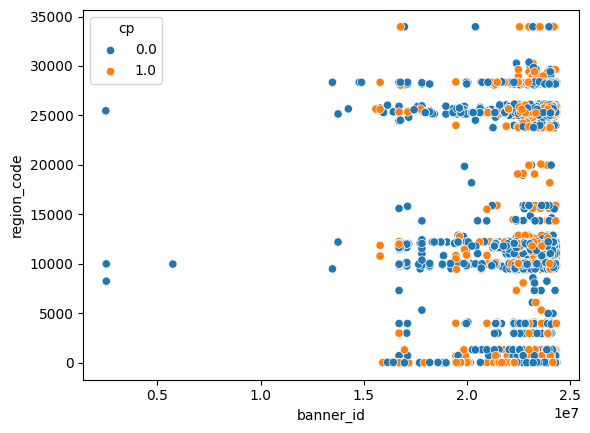

In [49]:
sns.scatterplot(x=df_train_undersample['banner_id'], y=df_train_undersample['region_code'], hue=df_train_undersample['cp'])

<Axes: xlabel='banner_id', ylabel='region_code'>

d:\Startup\PropellerAds\ds_homework_sample\.env\lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
d:\Startup\PropellerAds\ds_homework_sample\.env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


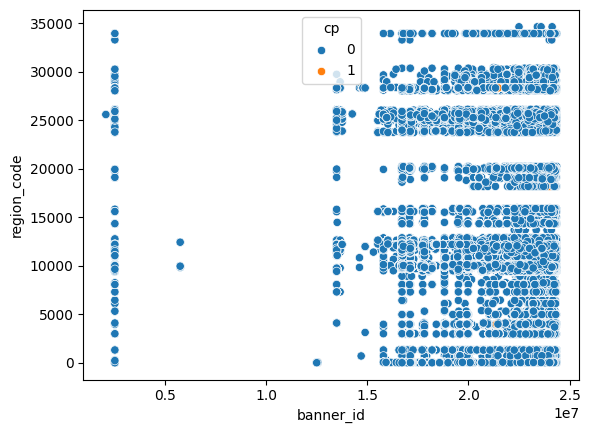

In [44]:
sns.scatterplot(x=X_train['banner_id'], y=X_train['region_code'], hue=y_train)

### Undersampling majority class in test dataset

In [51]:
# Apply K-Means clustering to the majority class samples
kmeans = KMeans(n_clusters=500, random_state=0)
majority_class_indices = np.where(y_test == 0)[0]
X_majority = X_test.iloc[majority_class_indices]
cluster_assignments = kmeans.fit_predict(X_majority)

# Count the number of samples in each cluster
unique_labels, counts = np.unique(cluster_assignments, return_counts=True)

# Create a dictionary mapping cluster labels to sample counts
cluster_counts = dict(zip(unique_labels, counts))

# Print the cluster counts
print(cluster_counts)

# Determine the desired number of samples per cluster
samples_per_cluster = 1

undersampled_data = []
data = X_train.to_numpy()
# Iterate through each cluster
for cluster_label in np.unique(cluster_assignments):
    # Get the indices of samples in the current cluster
    cluster_indices = np.where(cluster_assignments == cluster_label)[0]
    
    # Randomly select 'samples_per_cluster' samples from the current cluster
    selected_indices = np.random.choice(cluster_indices, size=samples_per_cluster, replace=False)
    
    # Add the selected samples to the undersampled dataset
    undersampled_data.extend(data[selected_indices])

# Convert the undersampled data to a NumPy array
undersampled_data_test = np.array(undersampled_data)

d:\Startup\PropellerAds\ds_homework_sample\.env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0: 117, 1: 46, 2: 23, 3: 51, 4: 16, 5: 49, 6: 4, 7: 14, 8: 2, 9: 43, 10: 52, 11: 17, 12: 32, 13: 6, 14: 26, 15: 8, 16: 21, 17: 4, 18: 58, 19: 24, 20: 39, 21: 55, 22: 61, 23: 37, 24: 33, 25: 12, 26: 47, 27: 29, 28: 4, 29: 65, 30: 24, 31: 17, 32: 12, 33: 1, 34: 76, 35: 8, 36: 7, 37: 48, 38: 10, 39: 3, 40: 59, 41: 5, 42: 56, 43: 27, 44: 13, 45: 17, 46: 2, 47: 34, 48: 14, 49: 4, 50: 12, 51: 7, 52: 31, 53: 44, 54: 2, 55: 42, 56: 20, 57: 17, 58: 55, 59: 39, 60: 8, 61: 12, 62: 20, 63: 18, 64: 27, 65: 15, 66: 17, 67: 14, 68: 79, 69: 42, 70: 3, 71: 16, 72: 79, 73: 9, 74: 5, 75: 17, 76: 4, 77: 10, 78: 26, 79: 71, 80: 13, 81: 49, 82: 56, 83: 16, 84: 17, 85: 32, 86: 13, 87: 6, 88: 34, 89: 1, 90: 1, 91: 62, 92: 3, 93: 18, 94: 33, 95: 12, 96: 14, 97: 72, 98: 65, 99: 21, 100: 12, 101: 1, 102: 30, 103: 2, 104: 27, 105: 7, 106: 3, 107: 111, 108: 52, 109: 21, 110: 16, 111: 4, 112: 34, 113: 25, 114: 10, 115: 2, 116: 78, 117: 37, 118: 27, 119: 20, 120: 10, 121: 34, 122: 23, 123: 10, 124: 4, 125: 26, 126:

In [52]:
# Concat undersample majority class and minor class samples for the training dataset
df_test =  pd.concat([X_test, y_test], axis=1)
df_test_1 = df_test[df_test['cp'] == 1]
X_1_test = df_test_1.drop(['cp'], axis=1)
y_1_test = df_test_1['cp']

X0_test_undersample = pd.DataFrame(undersampled_data_test, columns=X_1_class.columns)
y0_test_undersample = pd.DataFrame(np.zeros(X0_test_undersample.shape[0]), columns=['cp'])
df0_test_undersample = pd.concat([X0_test_undersample, y0_test_undersample], axis=1)
df1_test_undersample = pd.concat([X_1_test, y_1_test], axis=1)
df_test_undersample = pd.concat([df0_test_undersample, df1_test_undersample], axis=0)
df_test_undersample = df_test_undersample.reset_index(drop=True)

# Create csv file
df_test_undersample.to_csv('datasets/test.csv', index=False)